# Final Project - Spotify API
### Josephine Light 

I have decided to look at Harry Styles and Taylor Swift and compare audio scores to one another as they both are some of the hottest artists out right now. With the issue with sales of Taylors tour coming up and Harry extending his tour, I thought it would be cool to comapre and contrast two "similar" artists. 

Comparing analysis of their top albums. 

In [43]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 200

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

import requests, json
from datetime import datetime, timedelta

from IPython.display import Image

In [44]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [45]:
manager = SpotifyClientCredentials(
    client_id = 'e29108d2b0054728a7e026ffcfcc81ec',
    client_secret = 'fb5c0c6376d549ab94d0d15800ee8e2f'
)
sp = spotipy.Spotify(client_credentials_manager = manager)

## Taylor Swift Breakdown

In [46]:
artist_search = sp.search("Taylor Swift", type='artist')
artist_search

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Taylor+Swift&type=artist&offset=0&limit=10',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'followers': {'href': None, 'total': 63840838},
    'genres': ['pop'],
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
      'width': 160}],
    'name': 'Taylor Swift',
    'popularity': 100,
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/2S2picDoFGoDOm3Kj3JtME'},
    'follo

In [47]:
# pulling just Taylor Swift out of the Dictionary 
artist_search['artists']['items'][0]

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 63840838},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

In [48]:
# amount of followers 
artist_search['artists']['items'][0]['followers']['total']

63840838

In [49]:
# looking at Taylor Swift specific genres -> he strictly stays in pop
artist_search['artists']['items'][0]['genres']

['pop']

In [50]:
# Looking at popularity -> 100 being the most popular
artist_search['artists']['items'][0]['popularity']

100

In [51]:
Image(url=artist_search['artists']['items'][0]['images'][0]['url'])

In [52]:
tswift_artist_id = artist_search['artists']['items'][0]['id']
tswift_top_tracks = sp.artist_top_tracks(tswift_artist_id,country='US')

In [53]:
tswift_top_tracks

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
      'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
      'id': '06HL4z0CvFAxyc27GXpf02',
      'name': 'Taylor Swift',
      'type': 'artist',
      'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/151w1FgRZfnKZA9FEcg9Z3'},
    'href': 'https://api.spotify.com/v1/albums/151w1FgRZfnKZA9FEcg9Z3',
    'id': '151w1FgRZfnKZA9FEcg9Z3',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273bb54dde68cd23e2a268ae0f5',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02bb54dde68cd23e2a268ae0f5',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851bb54dde68cd23e2a268ae0f5',
      'width': 64}],
    'name': 'Midnights',
    'release_date': '202

In [54]:
tswift_top_tracks['tracks'][0]['name']

'Anti-Hero'

In [55]:
# on a scale of 100 -> very popular song 
tswift_top_tracks['tracks'][0]['popularity']

97

In [56]:
# Release day was May 5, 2022
tswift_top_tracks['tracks'][0]['album']['release_date']

'2022-10-21'

In [57]:
# Printing out all of Taylor Swift top tracks
for i,track in enumerate(tswift_top_tracks['tracks'],start=1):
    print(
        "{rank}. {name} (Popularity = {popularity})".format(
            rank = i,
            name = track['name'],
            popularity = track['popularity']
        )
    )
    
# more than half of his most popular songs are from his most recent album 'Harrys House'

1. Anti-Hero (Popularity = 97)
2. Lavender Haze (Popularity = 90)
3. Midnight Rain (Popularity = 90)
4. Snow On The Beach (feat. Lana Del Rey) (Popularity = 89)
5. Maroon (Popularity = 88)
6. You're On Your Own, Kid (Popularity = 88)
7. Karma (Popularity = 87)
8. Bejeweled (Popularity = 87)
9. Don’t Blame Me (Popularity = 87)
10. Would've, Could've, Should've (Popularity = 73)


In [58]:
tswift_albums = sp.artist_albums(tswift_artist_id)
tswift_albums

{'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02/albums?offset=0&limit=20&include_groups=album,single,compilation,appears_on',
 'items': [{'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
     'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
     'id': '06HL4z0CvFAxyc27GXpf02',
     'name': 'Taylor Swift',
     'type': 'artist',
     'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',

In [59]:
for i,album in enumerate(tswift_albums['items'],start=1):
    print(
        "{rank}. {name} - released {date}".format(
            rank = i,
            name = album['name'],
            date = album['release_date']
        )
    )
    
# The first three are the actual albums 

1. Midnights (3am Edition) - released 2022-10-22
2. Midnights (3am Edition) - released 2022-10-21
3. Midnights - released 2022-10-21
4. Midnights - released 2022-10-21
5. Red (Taylor's Version) - released 2021-11-12
6. Red (Taylor's Version) - released 2021-11-12
7. Fearless (Taylor's Version) - released 2021-04-09
8. evermore (deluxe version) - released 2021-01-07
9. evermore (deluxe version) - released 2021-01-07
10. evermore - released 2020-12-11
11. evermore - released 2020-12-11
12. evermore - released 2020-12-10
13. folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] - released 2020-11-25
14. folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition] - released 2020-11-25
15. folklore (deluxe version) - released 2020-08-18
16. folklore (deluxe version) - released 2020-08-17
17. folklore - released 2020-07-24
18. folklore - released 2020-07-24
19. Lover - released 2019-08-23
20. Taylor Swift Karaoke: reputation - released 20

In [60]:
# Looking into the numbers of Tswift top selling album 
tswift_top_album = sp.search("Midnights (3am Edition)",type='album')
tswift_top_album

{'albums': {'href': 'https://api.spotify.com/v1/search?query=Midnights+%283am+Edition%29&type=album&offset=0&limit=10',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
      'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
      'id': '06HL4z0CvFAxyc27GXpf02',
      'name': 'Taylor Swift',
      'type': 'artist',
      'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',


In [61]:
# Harrys House is available in 184 markets 
len(tswift_top_album['albums']['items'][0]['available_markets'])

182

In [62]:
# Same release date as the number 1 song on the album 'As It Was'
tswift_top_album['albums']['items'][0]['release_date']

'2022-10-22'

In [63]:
# a total of 13 songs on the album
tswift_top_album['albums']['items'][0]['total_tracks']

20

In [64]:
Image(url=tswift_top_album['albums']['items'][0]['images'][0]['url'])

### Audio and Feature Analysis of Taylor Swift - Midnights 3 AM

In [65]:
album_id = tswift_top_album['albums']['items'][0]['id']
print(album_id)
album_tracks = sp.album_tracks(album_id)

3lS1y25WAhcqJDATJK70Mq


In [66]:
album_tracks

{'href': 'https://api.spotify.com/v1/albums/3lS1y25WAhcqJDATJK70Mq/tracks?offset=0&limit=50',
 'items': [{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
     'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
     'id': '06HL4z0CvFAxyc27GXpf02',
     'name': 'Taylor Swift',
     'type': 'artist',
     'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FJ',
    'FM',
    'FR',
    'GA',
    'GB',
    

In [67]:
# Looking at Tswift You Belong With Me

AntiHero_search = sp.search('Anti-Hero',type='track')

print("Artist:", AntiHero_search['tracks']['items'][0]['artists'][0]['name'])
print("Track:", AntiHero_search['tracks']['items'][0]['name'])
print("ID:", AntiHero_search['tracks']['items'][0]['id'])

AntiHero_id = AntiHero_search['tracks']['items'][0]['id']

Artist: Taylor Swift
Track: Anti-Hero
ID: 0V3wPSX9ygBnCm8psDIegu


In [68]:
AntiHero_audio_analysis = sp.audio_analysis(AntiHero_id)
AntiHero_audio_analysis['segments']

[{'start': 0.0,
  'duration': 0.20322,
  'confidence': 0.0,
  'loudness_start': -60.0,
  'loudness_max_time': 0.0,
  'loudness_max': -60.0,
  'loudness_end': 0.0,
  'pitches': [0.479,
   1.0,
   0.206,
   0.137,
   0.047,
   0.048,
   0.051,
   0.055,
   0.09,
   0.09,
   0.059,
   0.096],
  'timbre': [0.433,
   166.411,
   16.934,
   -39.111,
   57.537,
   -55.396,
   18.806,
   -6.179,
   -26.992,
   -1.374,
   0.467,
   -8.988]},
 {'start': 0.20322,
  'duration': 0.30762,
  'confidence': 1.0,
  'loudness_start': -60.0,
  'loudness_max_time': 0.00806,
  'loudness_max': -10.24,
  'loudness_end': 0.0,
  'pitches': [0.312,
   1.0,
   0.678,
   0.393,
   0.237,
   0.374,
   0.12,
   0.181,
   0.021,
   0.074,
   0.036,
   0.184],
  'timbre': [39.674,
   -47.21,
   -124.633,
   96.663,
   -17.066,
   -97.862,
   -48.126,
   84.41,
   35.101,
   -24.128,
   -29.029,
   9.2]},
 {'start': 0.51084,
  'duration': 0.15669,
  'confidence': 0.875,
  'loudness_start': -38.412,
  'loudness_max_time

In [69]:
AntiHero_audio_features = sp.audio_features(AntiHero_id)
AntiHero_audio_features

[{'danceability': 0.637,
  'energy': 0.643,
  'key': 4,
  'loudness': -6.571,
  'mode': 1,
  'speechiness': 0.0519,
  'acousticness': 0.13,
  'instrumentalness': 1.8e-06,
  'liveness': 0.142,
  'valence': 0.533,
  'tempo': 97.008,
  'type': 'audio_features',
  'id': '0V3wPSX9ygBnCm8psDIegu',
  'uri': 'spotify:track:0V3wPSX9ygBnCm8psDIegu',
  'track_href': 'https://api.spotify.com/v1/tracks/0V3wPSX9ygBnCm8psDIegu',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0V3wPSX9ygBnCm8psDIegu',
  'duration_ms': 200690,
  'time_signature': 4}]

<AxesSubplot:>

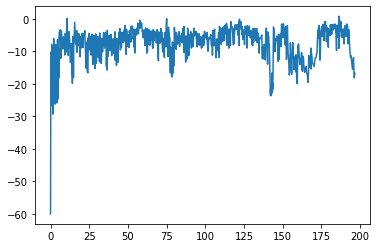

In [83]:
# loudness of track over time 

AntiHero_loudness_d = {seg['start'] : seg['loudness_max'] for seg in AntiHero_audio_analysis['segments']}
pd.Series(AntiHero_loudness_d).plot()

<AxesSubplot:>

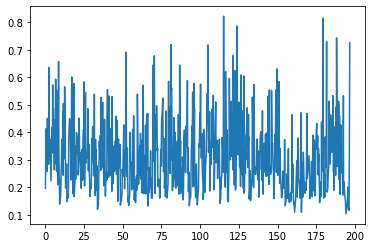

In [84]:
# average pitch of the song overtime 

AntiHero_pitch_d = {seg['start'] : np.mean(seg['pitches']) for seg in AntiHero_audio_analysis['segments']}
pd.Series(AntiHero_pitch_d).plot()

In [72]:
# Passing multiple tracks 

tswift_track_ids = [t['id'] for t in album_tracks['items']]
dsotm_audio_features = sp.audio_features(tswift_track_ids)
dsotm_audio_features

[{'danceability': 0.735,
  'energy': 0.444,
  'key': 10,
  'loudness': -10.519,
  'mode': 1,
  'speechiness': 0.0684,
  'acousticness': 0.204,
  'instrumentalness': 0.0012,
  'liveness': 0.17,
  'valence': 0.0984,
  'tempo': 97.038,
  'type': 'audio_features',
  'id': '4g2c7NoTWAOSYDy44l9nub',
  'uri': 'spotify:track:4g2c7NoTWAOSYDy44l9nub',
  'track_href': 'https://api.spotify.com/v1/tracks/4g2c7NoTWAOSYDy44l9nub',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4g2c7NoTWAOSYDy44l9nub',
  'duration_ms': 202396,
  'time_signature': 4},
 {'danceability': 0.658,
  'energy': 0.378,
  'key': 7,
  'loudness': -8.3,
  'mode': 1,
  'speechiness': 0.0379,
  'acousticness': 0.0593,
  'instrumentalness': 0,
  'liveness': 0.0976,
  'valence': 0.0382,
  'tempo': 108.034,
  'type': 'audio_features',
  'id': '199E1RRrVmVTQqBXih5qRC',
  'uri': 'spotify:track:199E1RRrVmVTQqBXih5qRC',
  'track_href': 'https://api.spotify.com/v1/tracks/199E1RRrVmVTQqBXih5qRC',
  'analysis_url': 'https://api

In [73]:
dsotm_audio_features_df = pd.DataFrame(dsotm_audio_features)
dsotm_audio_features_df.set_index('id',inplace=True)
dsotm_audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
4g2c7NoTWAOSYDy44l9nub,0.735,0.444,10,-10.519,1,0.0684,0.2040,0.001200,0.1700,0.0984,97.038,audio_features,spotify:track:4g2c7NoTWAOSYDy44l9nub,https://api.spotify.com/v1/tracks/4g2c7NoTWAOS...,https://api.spotify.com/v1/audio-analysis/4g2c...,202396,4
199E1RRrVmVTQqBXih5qRC,0.658,0.378,7,-8.300,1,0.0379,0.0593,0.000000,0.0976,0.0382,108.034,audio_features,spotify:track:199E1RRrVmVTQqBXih5qRC,https://api.spotify.com/v1/tracks/199E1RRrVmVT...,https://api.spotify.com/v1/audio-analysis/199E...,218271,4
02Zkkf2zMkwRGQjZ7T4p8f,0.638,0.634,4,-6.582,1,0.0457,0.1330,0.000001,0.1520,0.5190,96.953,audio_features,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,https://api.spotify.com/v1/tracks/02Zkkf2zMkwR...,https://api.spotify.com/v1/audio-analysis/02Zk...,200690,4
6ADDIJxxqzM9LMpm78yzQG,0.659,0.323,9,-13.425,1,0.0436,0.7350,0.003210,0.1160,0.1540,110.007,audio_features,spotify:track:6ADDIJxxqzM9LMpm78yzQG,https://api.spotify.com/v1/tracks/6ADDIJxxqzM9...,https://api.spotify.com/v1/audio-analysis/6ADD...,256124,4
7gVWKBcfIW93YxNBi3ApIE,0.694,0.380,2,-10.307,1,0.0614,0.4160,0.000008,0.1260,0.3760,120.044,audio_features,spotify:track:7gVWKBcfIW93YxNBi3ApIE,https://api.spotify.com/v1/tracks/7gVWKBcfIW93...,https://api.spotify.com/v1/audio-analysis/7gVW...,194207,4
6Nl7KyvjkFncGsjB49SxLl,0.636,0.377,0,-11.721,1,0.0708,0.7100,0.000065,0.1150,0.2300,139.966,audio_features,spotify:track:6Nl7KyvjkFncGsjB49SxLl,https://api.spotify.com/v1/tracks/6Nl7KyvjkFnc...,https://api.spotify.com/v1/audio-analysis/6Nl7...,174783,4
6C7OF1Jal7YkyjzyUG8vkK,0.751,0.502,7,-8.777,1,0.1620,0.2260,0.000000,0.2970,0.1120,108.989,audio_features,spotify:track:6C7OF1Jal7YkyjzyUG8vkK,https://api.spotify.com/v1/tracks/6C7OF1Jal7Yk...,https://api.spotify.com/v1/audio-analysis/6C7O...,210557,4
5yeuXkukVGuix3vmLu2BPJ,0.870,0.279,4,-11.134,0,0.3640,0.1600,0.000017,0.1210,0.1600,79.996,audio_features,spotify:track:5yeuXkukVGuix3vmLu2BPJ,https://api.spotify.com/v1/tracks/5yeuXkukVGui...,https://api.spotify.com/v1/audio-analysis/5yeu...,164801,4
0jvo9CjnbR0lYUDTSNTMiu,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,0.0910,0.4120,164.003,audio_features,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4


In [74]:
# Grabbing the names of the songs associated with the ID

track_metadata = {}

for t in album_tracks['items']:
    track_metadata[t['id']] = {}
    track_metadata[t['id']]['name'] = t['name']
    track_metadata[t['id']]['artist'] = t['artists'][0]['name']
    track_metadata[t['id']]['number'] = t['track_number']
    track_metadata[t['id']]['markets'] = len(t['available_markets'])
                 

track_metadata_df = pd.DataFrame(track_metadata).T
track_metadata_df

,name,artist,number,markets
4g2c7NoTWAOSYDy44l9nub,Lavender Haze,Taylor Swift,1,182
199E1RRrVmVTQqBXih5qRC,Maroon,Taylor Swift,2,182
02Zkkf2zMkwRGQjZ7T4p8f,Anti-Hero,Taylor Swift,3,182
6ADDIJxxqzM9LMpm78yzQG,Snow On The Beach (feat. Lana Del Rey),Taylor Swift,4,182
7gVWKBcfIW93YxNBi3ApIE,"You're On Your Own, Kid",Taylor Swift,5,182
6Nl7KyvjkFncGsjB49SxLl,Midnight Rain,Taylor Swift,6,182
6C7OF1Jal7YkyjzyUG8vkK,Question...?,Taylor Swift,7,182
5yeuXkukVGuix3vmLu2BPJ,Vigilante Shit,Taylor Swift,8,182
0jvo9CjnbR0lYUDTSNTMiu,Bejeweled,Taylor Swift,9,182
43q586vP8gGkYypKoSddhl,Labyrinth,Taylor Swift,10,182


In [75]:
# JOINING THE DATAFRAMES
# having the song next to the ID name to associate the two together 

track_audio_metadata_df = pd.merge(
    left = track_metadata_df,
    right = dsotm_audio_features_df,
    left_index = True,
    right_index = True,
    how = 'outer'
)

track_audio_metadata_df

,name,artist,number,markets,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
4g2c7NoTWAOSYDy44l9nub,Lavender Haze,Taylor Swift,1,182,0.735,0.444,10,-10.519,1,0.0684,0.2040,0.001200,0.1700,0.0984,97.038,audio_features,spotify:track:4g2c7NoTWAOSYDy44l9nub,https://api.spotify.com/v1/tracks/4g2c7NoTWAOS...,https://api.spotify.com/v1/audio-analysis/4g2c...,202396,4
199E1RRrVmVTQqBXih5qRC,Maroon,Taylor Swift,2,182,0.658,0.378,7,-8.300,1,0.0379,0.0593,0.000000,0.0976,0.0382,108.034,audio_features,spotify:track:199E1RRrVmVTQqBXih5qRC,https://api.spotify.com/v1/tracks/199E1RRrVmVT...,https://api.spotify.com/v1/audio-analysis/199E...,218271,4
02Zkkf2zMkwRGQjZ7T4p8f,Anti-Hero,Taylor Swift,3,182,0.638,0.634,4,-6.582,1,0.0457,0.1330,0.000001,0.1520,0.5190,96.953,audio_features,spotify:track:02Zkkf2zMkwRGQjZ7T4p8f,https://api.spotify.com/v1/tracks/02Zkkf2zMkwR...,https://api.spotify.com/v1/audio-analysis/02Zk...,200690,4
6ADDIJxxqzM9LMpm78yzQG,Snow On The Beach (feat. Lana Del Rey),Taylor Swift,4,182,0.659,0.323,9,-13.425,1,0.0436,0.7350,0.003210,0.1160,0.1540,110.007,audio_features,spotify:track:6ADDIJxxqzM9LMpm78yzQG,https://api.spotify.com/v1/tracks/6ADDIJxxqzM9...,https://api.spotify.com/v1/audio-analysis/6ADD...,256124,4
7gVWKBcfIW93YxNBi3ApIE,"You're On Your Own, Kid",Taylor Swift,5,182,0.694,0.380,2,-10.307,1,0.0614,0.4160,0.000008,0.1260,0.3760,120.044,audio_features,spotify:track:7gVWKBcfIW93YxNBi3ApIE,https://api.spotify.com/v1/tracks/7gVWKBcfIW93...,https://api.spotify.com/v1/audio-analysis/7gVW...,194207,4
6Nl7KyvjkFncGsjB49SxLl,Midnight Rain,Taylor Swift,6,182,0.636,0.377,0,-11.721,1,0.0708,0.7100,0.000065,0.1150,0.2300,139.966,audio_features,spotify:track:6Nl7KyvjkFncGsjB49SxLl,https://api.spotify.com/v1/tracks/6Nl7KyvjkFnc...,https://api.spotify.com/v1/audio-analysis/6Nl7...,174783,4
6C7OF1Jal7YkyjzyUG8vkK,Question...?,Taylor Swift,7,182,0.751,0.502,7,-8.777,1,0.1620,0.2260,0.000000,0.2970,0.1120,108.989,audio_features,spotify:track:6C7OF1Jal7YkyjzyUG8vkK,https://api.spotify.com/v1/tracks/6C7OF1Jal7Yk...,https://api.spotify.com/v1/audio-analysis/6C7O...,210557,4
5yeuXkukVGuix3vmLu2BPJ,Vigilante Shit,Taylor Swift,8,182,0.870,0.279,4,-11.134,0,0.3640,0.1600,0.000017,0.1210,0.1600,79.996,audio_features,spotify:track:5yeuXkukVGuix3vmLu2BPJ,https://api.spotify.com/v1/tracks/5yeuXkukVGui...,https://api.spotify.com/v1/audio-analysis/5yeu...,164801,4
0jvo9CjnbR0lYUDTSNTMiu,Bejeweled,Taylor Swift,9,182,0.700,0.550,7,-9.130,1,0.0653,0.0661,0.000102,0.0910,0.4120,164.003,audio_features,spotify:track:0jvo9CjnbR0lYUDTSNTMiu,https://api.spotify.com/v1/tracks/0jvo9CjnbR0l...,https://api.spotify.com/v1/audio-analysis/0jvo...,194166,4
43q586vP8gGkYypKoSddhl,Labyrinth,Taylor Swift,10,182,0.487,0.313,0,-15.434,1,0.0487,0.7910,0.348000,0.1240,0.1410,110.039,audio_features,spotify:track:43q586vP8gGkYypKoSddhl,https://api.spotify.com/v1/tracks/43q586vP8gGk...,https://api.spotify.com/v1/audio-analysis/43q5...,247962,4


In [80]:
# Calculating the mean danceability of the 'Midnights 3am Version' Album 
dsotm_audio_features_df['danceability'].mean()

0.6266500000000002

In [82]:
dsotm_audio_features_df['speechiness'].mean()

0.09207499999999999

## Looking at how each track relates to one another 

In [85]:
# Step 1: Choose a class of models
from sklearn.decomposition import PCA

# Step 2: Instantiate the model
track_pca = PCA(n_components=2)

# Step 3: Arrange the data into features matrices
select_features = track_audio_metadata_df[dsotm_audio_features_df.columns[:11]]
X = select_features.values

# Step 4: Fit the model to the data
track_pca.fit(X)

print("Explained variance ratio:",track_pca.explained_variance_ratio_)

# Step 5: Evaluate the model
X_pca = track_pca.transform(X)
print("Original shape:", X.shape)
print("Transformed shape:", X_pca.shape)

Explained variance ratio: [0.97721447 0.01718365]
Original shape: (20, 11)
Transformed shape: (20, 2)


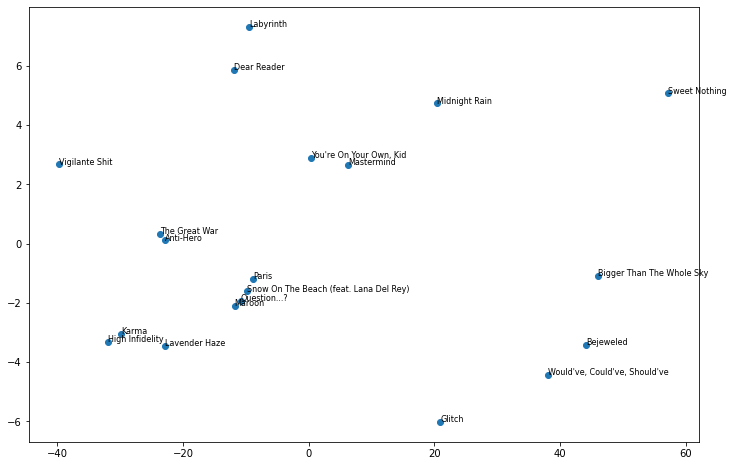

In [92]:
f,ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(X_pca[:,0],X_pca[:,1])

for i,txt in enumerate(track_audio_metadata_df['name'].values):
    ax.annotate(txt,(X_pca[i,0],X_pca[i,1]),size=8)